# レーザーテック 株価（日足）

In [1]:
import sys
sys.path.append('..')

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

from funcs.technical import psar

In [2]:
symbol = '6920.T'
ticker = yf.Ticker(symbol)

df = ticker.history(period='6mo')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-09-05 00:00:00+09:00,24253.249691,24486.454015,23236.081895,23553.636719,8845400,0.0,0.0
2024-09-06 00:00:00+09:00,23667.757668,23791.802519,22655.551679,23136.845703,6737200,0.0,0.0
2024-09-09 00:00:00+09:00,21648.307940,22184.181710,21176.937495,22025.404297,10383600,0.0,0.0
2024-09-10 00:00:00+09:00,22149.447623,22318.148613,21251.362941,21841.816406,10451300,0.0,0.0
2024-09-11 00:00:00+09:00,22020.441710,22427.308817,21499.453342,21871.587891,10513000,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-27 00:00:00+09:00,14725.000000,14800.000000,14340.000000,14400.000000,4432300,0.0,0.0
2025-02-28 00:00:00+09:00,13900.000000,14065.000000,13250.000000,13370.000000,7919700,0.0,0.0
2025-03-03 00:00:00+09:00,13480.000000,13510.000000,13105.000000,13275.000000,5455900,0.0,0.0


## 日足チャートとパラボリック SAR

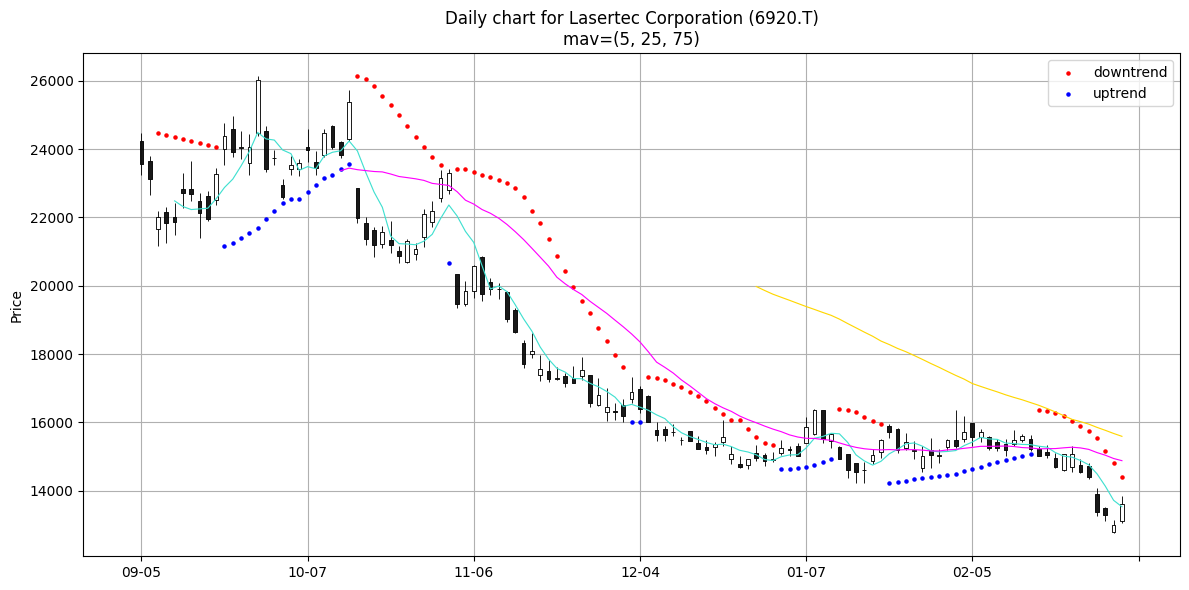

In [3]:
dict_psar = psar(df)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

apds  = [
    mpf.make_addplot(
        dict_psar['bear'],
        type='scatter',
        marker='o',
        markersize=5,
        color='red',
        label='downtrend',
        ax=ax
    ),
    mpf.make_addplot(
        dict_psar['bull'],
        type='scatter',
        marker='o',
        markersize=5,
        color='blue',
        label='uptrend',
        ax=ax
    ),
] 

mpf.plot(
    df,
    type='candle',
    style='default',
    mav=(5, 25, 75),
    volume=False,
    datetime_format='%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax,
)
try:
    ax.set_title('Daily chart for %s (%s)\nmav=(5, 25, 75)' % (ticker.info['longName'], symbol))
except KeyError:
    ax.set_title('Daily chart for %s\nmav=(5, 25, 75)' % symbol)

ax.grid()

plt.tight_layout()
plt.savefig('daily_chart_6920.png')
plt.show()

In [4]:
df.tail(2)['Close']

Date
2025-03-04 00:00:00+09:00    12990.0
2025-03-05 00:00:00+09:00    12990.0
Name: Close, dtype: float64

In [5]:
df.tail(2)['Close'].diff()

Date
2025-03-04 00:00:00+09:00    NaN
2025-03-05 00:00:00+09:00    0.0
Name: Close, dtype: float64